In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv', parse_dates=['Month'], index_col=0)
df.head()

,Milk
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Milk    168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [8]:
y = df['Milk']

### Cenetered MA

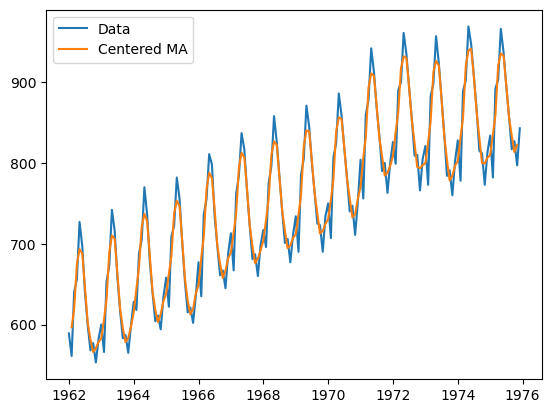

In [14]:
fcast = y.rolling(3, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label='Centered MA')
plt.legend(loc='best')
plt.show()

### Trailing MA

In [28]:
y_train = y[:'1974-12-01']
y_test = y['1975-01-01':]

In [37]:
window = 3
fcast = y_train.rolling(3).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
MA_fcast = pd.concat([fcast, MA_series])
MA_fcast

Month
1962-01-01           NaN
1962-02-01           NaN
1962-03-01    596.666667
1962-04-01    619.000000
1962-05-01    674.333333
                 ...    
1975-08-01    799.333333
1975-09-01    799.333333
1975-10-01    799.333333
1975-11-01    799.333333
1975-12-01    799.333333
Length: 168, dtype: float64

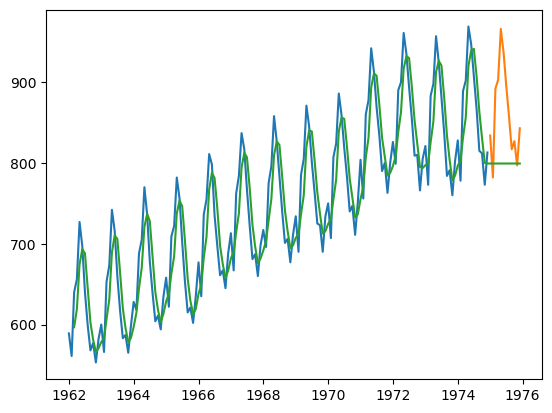

In [38]:
plt.plot(y_train, label='Training Data')
plt.plot(y_test, label='Test Data')
plt.plot(MA_fcast, label='Trailing MA')
plt.show()

In [41]:
rms = np.sqrt(mean_squared_error(y_test, MA_series))
print(rms)

83.33766655400582
